In [1]:
import pandas as pd
from scripts.helper import *
import matplotlib.pyplot as plt

In [2]:
ptaki_df = pd.read_json('data/master.json')
names = ptaki_df["Common name"]
ptaki_df = ptaki_df.drop(["id","rulings","Expansion","additionalRulings", "Scientific name", "Common name", "Forest",
    "Grassland",
    "Wetland","Power text", "Note","Anatomist",
    "Cartographer",
    "Historian",
    "Photographer",
    "Backyard Birder",
    "Bird Bander",
    "Bird Counter",
    "Bird Feeder",
    "Diet Specialist",
    "Enclosure Builder",
    "Falconer",
    "Fishery Manager",
    "Food Web Expert",
    "Forester",
    "Large Bird Specialist",
    "Nest Box Builder",
    "Omnivore Expert",
    "Passerine Specialist",
    "Platform Builder",
    "Prairie Manager",
    "Rodentologist",
    "Viticulturalist",
    "Wetland Scientist",
    "Wildlife Gardener",
    "Caprimulgiform Specialist",
    "Small Clutch Specialist",
    "Endangered Species Protector",
    "Beak Pointing Left",
    "Beak Pointing Right"], axis =1)

In [3]:
ptaki_df.groupby(["PowerCategory"]).size()

PowerCategory
Caching Food            12
Card-drawing            35
Egg-laying              35
Flocking                49
Food from Birdfeeder    12
Food from Supply        19
Food-related            48
Hunting and Fishing      8
Hunting and fishing     10
Hunting/Fishing         22
Other                   74
Tucking                  2
dtype: int64

/home/julia/miniconda3/envs/sklearn_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/julia/miniconda3/envs/sklearn_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/julia/miniconda3/envs/sklearn_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/julia/miniconda3/envs/sk

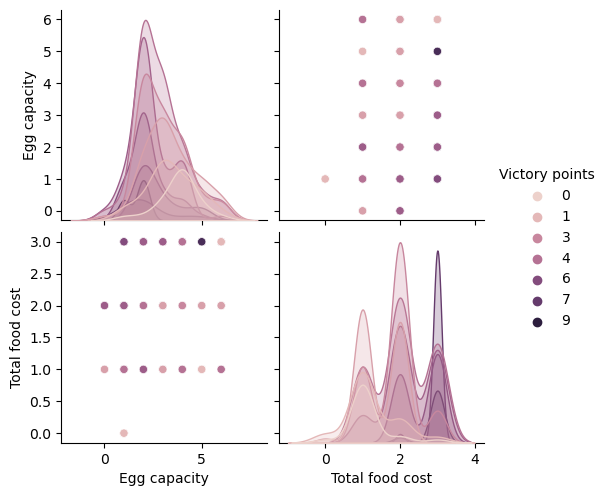

In [9]:
import seaborn as sns
cols = ['Color','PowerCategory','Egg capacity','Bonus card','Wingspan','Total food cost']

#fig, axes = plt.subplots(2,3)
pow_is = ptaki_df[['Egg capacity','Wingspan','Total food cost','Victory points']]#ptaki_df.fillna(value=0)

#p = sns.catplot(data=ptaki_df, x="PowerCategory", y="Victory points")
#p.ax.tick_params('x',rotation = 45)

sns.pairplot(data=pow_is, hue="Victory points")


/home/julia/miniconda3/envs/sklearn_env/lib/python3.12/site-packages/seaborn/_core/plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


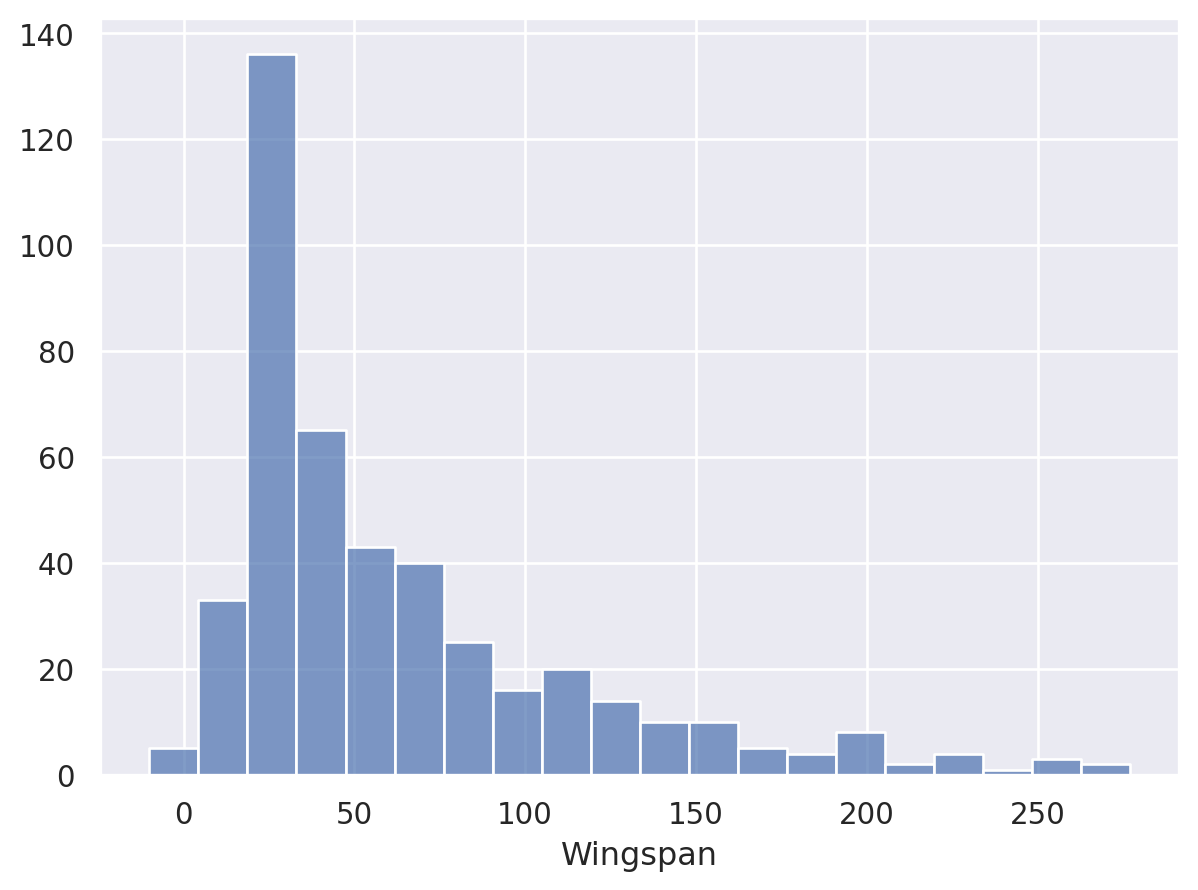

In [4]:
import seaborn.objects as so

#ptaki_df[["Common name","Wingspan"]].loc[ptaki_df["Wingspan"] == '*']

ptaki_df["Wingspan"] = ptaki_df["Wingspan"].apply(lambda x: float(x) if x != "*" else -10)
p = so.Plot(ptaki_df, "Wingspan")
p.add(so.Bars(), so.Hist(bins =20))

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder

column_trans = ColumnTransformer(
    [('norm_length', MinMaxScaler(), ['Wingspan']),
    ('one_hot_nest', OneHotEncoder(), ['Nest type','Color', 'PowerCategory'])],
    remainder='drop', verbose_feature_names_out=False)

column_trans.fit(ptaki_df)

column_trans.get_feature_names_out()


X_trans = column_trans.transform(ptaki_df.drop("Victory points", axis =1))

<1x26 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

## Linear regression

In [6]:
from sklearn.model_selection import train_test_split
X= X_trans
y = ptaki_df["Victory points"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

reg.predict(X_test[1])

array([2.22481425])

In [8]:
test_predictions = reg.predict(X_test)

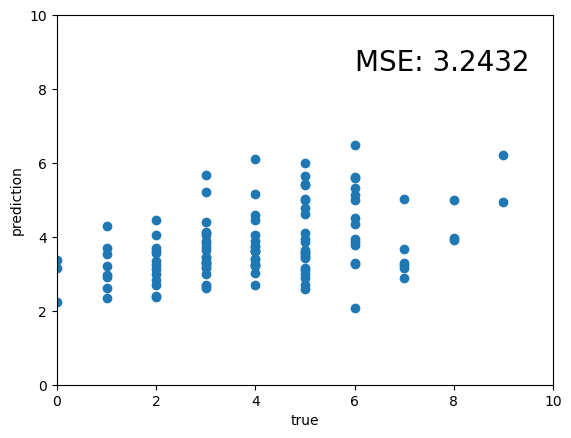

In [9]:
plot_regression(y_test,test_predictions,"LinRegMSE")

## SVM
### regression

In [10]:
from sklearn import svm
regr = svm.SVR()
regr.fit(X_train, y_train)

svm_pred = regr.predict(X_test)

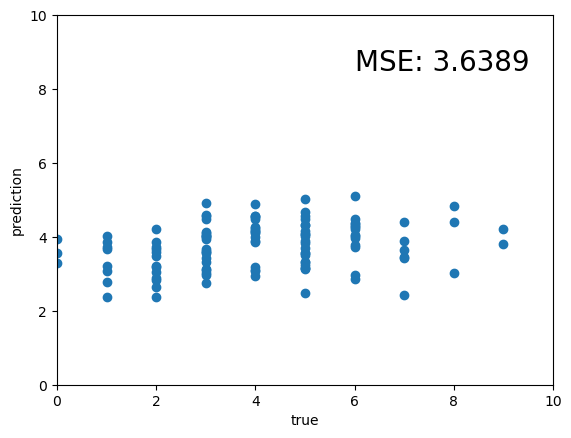

In [12]:
plot_regression(y_test,svm_pred,"SVM_MSE")

#### classification

In [13]:
classs = svm.SVC()
classs.fit(X_train, y_train)

svm_pred = classs.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, svm_pred)

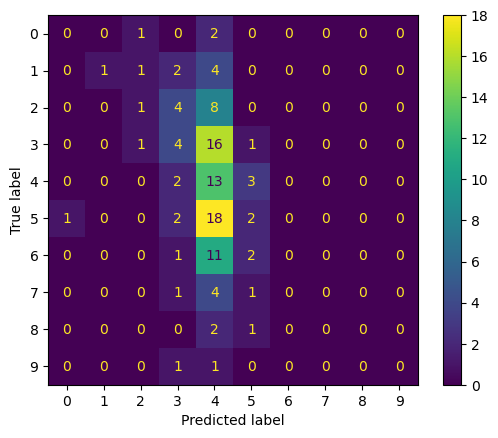

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf)
disp.plot()